In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

db_day = pd.read_csv('day.csv')
hdf = pd.read_csv('hour.csv')

# - instant: record index
# - dteday : date
# - season : season (1:winter, 2:spring, 3:summer, 4:fall)
# - yr : year (0: 2011, 1:2012)
# - mnth : month ( 1 to 12)
# - hr : hour (0 to 23)
# - holiday : weather day is holiday or not (extracted from [Web Link])
# - weekday : day of the week
# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# + weathersit :
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# - hum: Normalized humidity. The values are divided to 100 (max)
# - windspeed: Normalized wind speed. The values are divided to 67 (max)
# - casual: count of casual users
# - registered: count of registered users
# - cnt: count of total rental bikes including both casual and registered

In [47]:
hdf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [48]:
#pd.Series(hdf.casual.unique()).median()
hdf.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [49]:
hdf

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [50]:
pd.Series(hdf.dteday.unique())

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
726    2012-12-27
727    2012-12-28
728    2012-12-29
729    2012-12-30
730    2012-12-31
Length: 731, dtype: object

In [51]:
pd.to_datetime(hdf.dteday, yearfirst=True)

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [52]:
i = 0
wday = []
for i in range(7):
    ct_day = hdf[hdf['weekday'] == i].weekday.count()
    i += 1
    wday.append(ct_day)
wday

[2502, 2479, 2453, 2475, 2471, 2487, 2512]

In [53]:
type(hdf.dteday)

pandas.core.series.Series

In [54]:
hdf.loc[hdf['yr'] == 0, 'yr'] = 2011
hdf.loc[hdf['yr'] == 1, 'yr'] = 2012

In [55]:
hdf.loc[hdf['season'] == 1, 'season'] = 'Winter'
hdf.loc[hdf['season'] == 2, 'season'] = 'Spring'
hdf.loc[hdf['season'] == 3, 'season'] = 'Summer'
hdf.loc[hdf['season'] == 4, 'season'] = 'Fall'

In [56]:
hdf.loc[hdf['holiday'] == 0, 'holiday'] = 'no'
hdf.loc[hdf['holiday'] == 1, 'holiday'] = 'yes'
#hdf.loc[hdf['workingday'] == 0, 'workingday'] = 'no'
#hdf.loc[hdf['workingday'] == 1, 'workingday'] = 'yes'

In [57]:
hdf.loc[hdf['weekday'] == 0, 'calenderday'] = 'Mon'
hdf.loc[hdf['weekday'] == 1, 'calenderday'] = 'Tue'
hdf.loc[hdf['weekday'] == 2, 'calenderday'] = 'Wed'
hdf.loc[hdf['weekday'] == 3, 'calenderday'] = 'Thu'
hdf.loc[hdf['weekday'] == 4, 'calenderday'] = 'Fri'
hdf.loc[hdf['weekday'] == 5, 'calenderday'] = 'Sat'
hdf.loc[hdf['weekday'] == 6, 'calenderday'] = 'Sun'
hdf

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,calenderday
0,1,2011-01-01,Winter,2011,1,0,no,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Sun
1,2,2011-01-01,Winter,2011,1,1,no,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Sun
2,3,2011-01-01,Winter,2011,1,2,no,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Sun
3,4,2011-01-01,Winter,2011,1,3,no,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Sun
4,5,2011-01-01,Winter,2011,1,4,no,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,12,19,no,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Tue
17375,17376,2012-12-31,Winter,2012,12,20,no,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Tue
17376,17377,2012-12-31,Winter,2012,12,21,no,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Tue
17377,17378,2012-12-31,Winter,2012,12,22,no,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,Tue


In [58]:
#Counting the weekdays as working- and holidays
 
count_weekday_holiday = hdf[['calenderday','workingday']]
#count_weekday_holiday.drop_duplicates()
test = count_weekday_holiday.pivot_table(index=['calenderday', 'workingday'], aggfunc='size')
test

calenderday  workingday
Fri          0               48
             1             2423
Mon          0             2502
Sat          0               48
             1             2439
Sun          0             2512
Thu          0               24
             1             2451
Tue          0              357
             1             2122
Wed          0               23
             1             2430
dtype: int64

In [59]:
#Counting the weekdays as working- and holidays split into years
 
count_weekday_holiday_year = hdf[['calenderday','workingday', 'yr']]
#count_weekday_holiday.drop_duplicates()
test2 = count_weekday_holiday_year.pivot_table(index=['calenderday', 'workingday', 'yr'], aggfunc='size')
test2

calenderday  workingday  yr  
Fri          0           2011      24
                         2012      24
             1           2011    1201
                         2012    1222
Mon          0           2011    1231
                         2012    1271
Sat          0           2011      48
             1           2011    1191
                         2012    1248
Sun          0           2011    1264
                         2012    1248
Thu          0           2012      24
             1           2011    1229
                         2012    1222
Tue          0           2011     167
                         2012     190
             1           2011    1068
                         2012    1054
Wed          0           2012      23
             1           2011    1222
                         2012    1208
dtype: int64

In [60]:
test = pd.DataFrame(test.iloc[:].str.split(' ', 1).tolist(), columns = ['calenderday','workingday', 'sum'])
#test.columns =['alltogether']
#test[['weekday','workingday', 'sum']] = test.alltogether.str.split(" ",expand=True,)
#df = pd.DataFrame(df.row.str.split(' ',1).tolist(), columns = ['flips','row'])
test

AttributeError: Can only use .str accessor with string values!

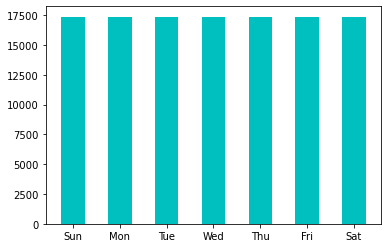

In [174]:
plt.bar(x=hdf.weekday, height = pd.Series(hdf.workingday.count()), color = 'c', width = 0.5)
plt.show()